In [1]:
import os
import numpy as p
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'C:\\Users\\Abraham_KINNIN\\Documents\\Python_Environement\\text_analyse'

In [5]:
files = os.listdir()
[print(file) for file in files]

.ipynb_checkpoints
NLTK.ipynb
talon_discours.txt
Text_mining.ipynb


[None, None, None, None]

In [7]:
with open("talon_discours.txt", "r", encoding = "utf8") as file:
    text = file.read()

In [9]:
text[:50]

"Je l'ai dit devant la représentation nationale et "

In [11]:
from nltk.tokenize import word_tokenize

In [13]:
liste_de_mots = word_tokenize(text)

In [120]:
# liste sans ponctuation 
import re
import re
import string
regex = re.compile('[%s]'%re.escape(string.punctuation)) 
liste_texte_sans_punctuation = []
for review in liste_de_mots:
    new_token = regex.sub(u'',review)
    if not new_token == u'':
        liste_texte_sans_punctuation.append(new_token)
print(liste_texte_sans_punctuation[:50])

['Je', 'lai', 'dit', 'devant', 'la', 'représentation', 'nationale', 'et', 'je', 'lai', 'dit', 'avec', 'foi', 'et', 'sincérité', 'A', 'mon', 'sens', 'le', 'Bénin', 'va', 'bien', 'Cest', 'vrai', 'nous', 'venons', 'de', 'loin', 'Il', 'y', 'a', 'des', 'raisons', 'bien', 'légitimes', 'dêtre', 'impatient', 'de', 'voir', 'que', 'les', 'choses', 'ne', 'vont', 'pas', 'aussi', 'vite', 'quon', 'lespérait', 'mais']


In [19]:
# frequence 
from nltk import FreqDist
from nltk import bigrams
freqence_words = FreqDist(liste_de_mots)
words=list(freqence_words.keys())
freqwords=list(freqence_words.values())

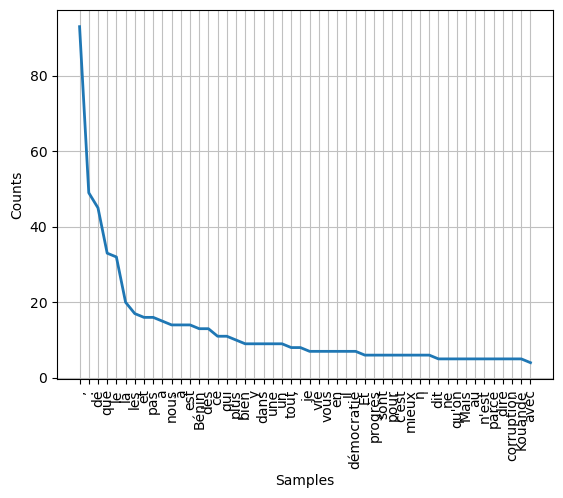

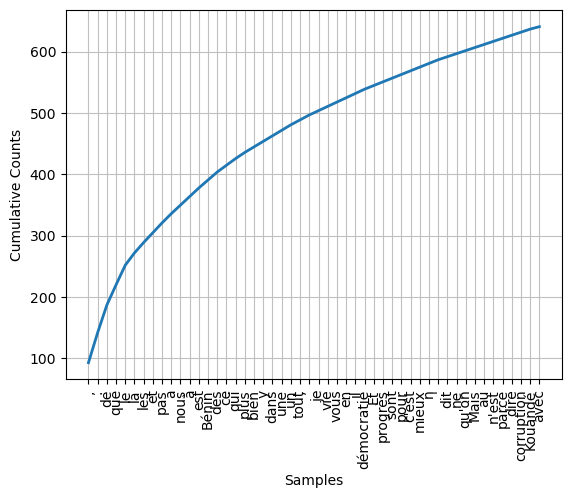

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [21]:
freqence_words.plot(50, cumulative=False) # Densité
freqence_words.plot(50, cumulative=True)

In [39]:
# collocations
#print(text.collocations())
import nltk
from nltk.collocations import *
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
trigram_words = TrigramCollocationFinder.from_words(liste_de_mots)
trigram_measure = TrigramAssocMeasures()

In [41]:
trigram_words.nbest(trigram_measure.pmi,20)

[('béninois', "d'alors", 'qualifiait'),
 ('légitimes', "d'être", 'impatient'),
 ('personne', "n'en", 'parlait'),
 ('vos', 'concitoyens', 'ressentent'),
 ('Les', 'microcrédits', 'fonctionnent'),
 ('Nous', 'démarrons', 'bientôt'),
 ('consommer', 'deux', 'fois'),
 ("d'alors", 'qualifiait', 'notre'),
 ('doit', 'préserver', 'sa'),
 ('président', 'béninois', "d'alors"),
 ('quatre', 'ou', 'cinq'),
 ('se', 'ressent', 'partout'),
 ('si', 'grande', 'envergure'),
 ('A', 'mon', 'sens'),
 ('Oui', '!', 'Parfois'),
 ('améliore', 'leur', 'pouvoir'),
 ('avez', 'vanté', 'suffisamment'),
 ('telle', "qu'elle", 'était'),
 ('?', 'De', 'toutes'),
 ('Nord', 'avant', 'Parakou')]

In [43]:
# enlevons les trigrams qui apparaissent juste 3 fois
trigram_words.apply_freq_filter(3)
trigram_words.nbest(trigram_measure.pmi,20)

[('n', "'", 'a'),
 ('il', 'y', 'a'),
 ('le', 'Bénin', 'va'),
 ("'", 'a', 'pas'),
 (',', 'il', 'y'),
 ('que', 'le', 'Bénin'),
 ('de', 'pagaille', ','),
 (',', 'de', 'corruption'),
 (',', 'de', 'la')]

In [67]:
# il va falloir qu'on enleve les stop words 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
mots_clean = [mot for mot in liste_de_mots if mot.lower() not in stop_words ]
trigram_words = TrigramCollocationFinder.from_words(mots_clean, window_size = 5)
trigram_words.apply_freq_filter(3)
print(trigram_words.nbest(trigram_measure.chi_sq, 20))

[('Bénin', 'va', 'bien'), ('besoins', ',', 'mieux'), ('va', 'bien', '.'), ('.', "'", 'a'), ('comme', 'dit', ','), (',', 'va', 'bien'), ('pagaille', ',', 'corruption'), ('démocratie', 'pagaille', ','), (',', 'Bénin', 'va'), (',', 'mieux', '.'), (',', 'libertés', ','), (',', 'paix', ','), (',', 'sécurité', ','), (',', 'Bénin', 'bien'), (',', ',', ','), ('.', ',', "c'est"), ('.', ',', 'a')]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abraham_KINNIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# enlevons les ponctuations
import string
nltk.download('punkt')
words_cleaned = [word for word in mots_clean if word not in string.punctuation]
words_cleaned[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abraham_KINNIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["l'ai",
 'dit',
 'devant',
 'représentation',
 'nationale',
 "l'ai",
 'dit',
 'foi',
 'sincérité',
 'A']

In [97]:
trigram_words = TrigramCollocationFinder.from_words(words_cleaned, window_size = 5)
trigram_words.apply_freq_filter(3)
print(trigram_words.nbest(trigram_measure.chi_sq, 15))

[('Bénin', 'va', 'bien')]


In [85]:
trigram_words = TrigramCollocationFinder.from_words(words_cleaned, window_size = 3)
trigram_words.apply_freq_filter(2)
print(trigram_words.nbest(trigram_measure.pmi, 15))

[('tous', 'secteurs', 'vie'), ('Bénin', 'va', 'bien')]


In [99]:
for n in range(3,7):
    trigram_list ={}
    trigram_words = TrigramCollocationFinder.from_words(words_cleaned, window_size = n)
    trigram_words.apply_freq_filter(3)
    trigram_list[n] = trigram_words.nbest(trigram_measure.pmi, 15)
    
for window_size, trigram in trigram_list.items():
    print(f"window_size {window_size} : {trigram}")

window_size 6 : [('constate', 'fonctionne', 'mieux'), ('fonctionne', 'mieux', 'microcrédits'), ('santé', 'fonctionne', 'mieux'), ('plus', 'plus', 'améliorent'), ('travaillent', 'plus', 'plus'), ('démocratie', 'pagaille', 'corruption'), ('Bénin', 'va', 'bien')]


In [103]:
# On remarque dans le discour des mots positif fonctionnent bien benin va bien mais aussi democratie pagaille corruption
# on va essayer de faire le plot des frequences des mots cleaned
from nltk import FreqDist
frequence_word = FreqDist(words_cleaned)
freq_key = list(frequence_word.keys())
freq_values = list(frequence_word.values())
print(freq_key[:20])
print(freq_values[:20])

["l'ai", 'dit', 'devant', 'représentation', 'nationale', 'foi', 'sincérité', 'A', 'sens', 'Bénin', 'va', 'bien', "C'est", 'vrai', 'venons', 'loin', 'a', 'raisons', 'légitimes', "d'être"]
[2, 5, 1, 1, 1, 1, 3, 1, 1, 13, 3, 9, 3, 3, 1, 1, 15, 1, 1, 1]


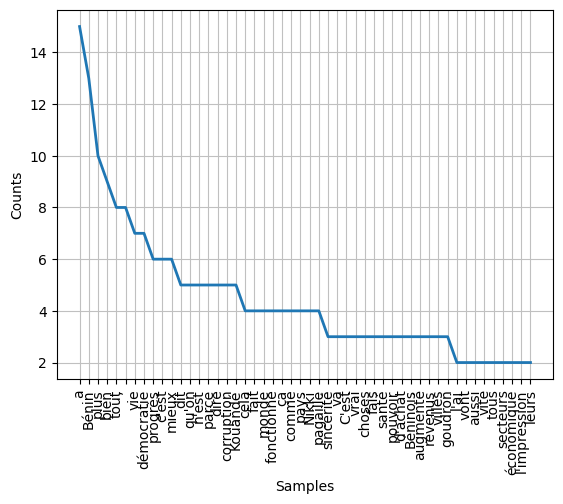

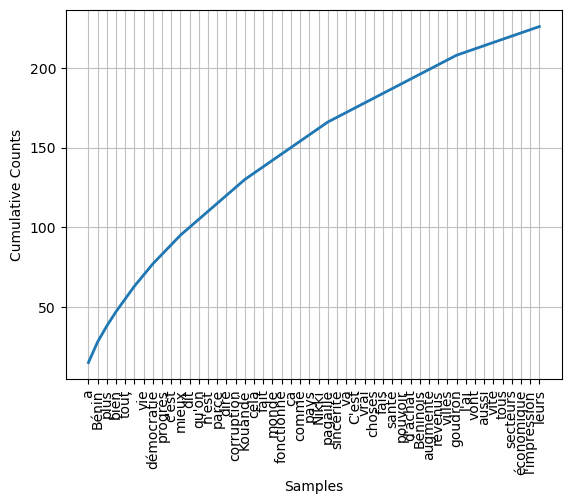

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [105]:
frequence_word.plot(50, cumulative = False)
frequence_word.plot(50, cumulative = True)

# Avancons upeu dans notre analyse 

In [110]:
# la lemmatisation
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer() 
words_lemmatized = [lemmatiser.lemmatize(word) for word in words_cleaned]
print(words_lemmatized[:20])

["l'ai", 'dit', 'devant', 'représentation', 'nationale', "l'ai", 'dit', 'foi', 'sincérité', 'A', 'sen', 'Bénin', 'va', 'bien', "C'est", 'vrai', 'venons', 'loin', 'a', 'raisons']


In [112]:
# les etiquetes grammaticals /post_tags
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
words_cleaned_tag = pos_tag(words_cleaned)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abraham_KINNIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [114]:
words_cleaned_tag[:50]

[("l'ai", 'NN'),
 ('dit', 'NN'),
 ('devant', 'JJ'),
 ('représentation', 'NN'),
 ('nationale', 'JJ'),
 ("l'ai", 'NN'),
 ('dit', 'NN'),
 ('foi', 'NN'),
 ('sincérité', 'VBD'),
 ('A', 'DT'),
 ('sens', 'JJ'),
 ('Bénin', 'NNP'),
 ('va', 'NN'),
 ('bien', 'NN'),
 ("C'est", 'NNP'),
 ('vrai', 'NN'),
 ('venons', 'NNS'),
 ('loin', 'VBP'),
 ('a', 'DT'),
 ('raisons', 'NNS'),
 ('bien', 'NN'),
 ('légitimes', 'VBZ'),
 ("d'être", 'JJ'),
 ('impatient', 'NN'),
 ('voir', 'NN'),
 ('choses', 'VBZ'),
 ('vont', 'JJ'),
 ('aussi', 'IN'),
 ('vite', 'JJ'),
 ("qu'on", 'JJ'),
 ("l'espérait", 'NN'),
 ('manière', 'NN'),
 ('globale', 'NN'),
 ('tous', 'JJ'),
 ('secteurs', 'NNS'),
 ('vie', 'VBP'),
 ('Bénin', 'NNP'),
 ('va', 'NN'),
 ('plutôt', 'NN'),
 ('bien', 'NN'),
 ('vanté', 'FW'),
 ('suffisamment', 'NN'),
 ('progrès', 'NN'),
 ('économique', 'NNP'),
 ('avez-vous', 'JJ'),
 ("l'impression", 'NN'),
 ('Monsieur', 'NNP'),
 ('Président', 'NNP'),
 ('concitoyens', 'VBZ'),
 ('ressentent', 'JJ')]

# Text clustering par des algorithmes basés sur la matrice TF-IDF

   Le TF-IDF (Frequency-Inverse Document Frequency) est une méthode de pondération des 
mots permettant d'évaluer l'importance d'un terme contenu dans un document, relativement à 
une collection de document ou un corpus. Le poids d’un mot augmente proportionnellement 
au nombre d'occurrences du mot dans le document mais inversement en fonction de la 
fréquence du mot dans l’ensemble des document ou du corpus.

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import sent_tokenize
with open("talon_discours.txt", "r", encoding = "utf8") as file:
    text = file.read()

phrases = sent_tokenize(text)

In [132]:
vectorizer = TfidfVectorizer(stop_words = stopwords.words('french'))
model = vectorizer.fit_transform(phrases)
score = model.mean(axis =1).A1

In [130]:
print(len(score))
print(len(phrases))

56
56


In [134]:
threshold = score.mean()
resumé = [phrases[i] for i in range(len(phrases)) if score[i]>=threshold ] 

In [138]:
print(len(resumé))

25


# Avantages de TF-IDF
Réduction du Bruit: Les mots très fréquents comme “le”, “et”, “est” sont pénalisés, ce qui réduit leur impact sur les modèles.
Importance Relative: Les mots spécifiques à certains documents sont mis en avant, ce qui aide à capturer le context et la signification des documents